# Logistic Regression

## Evaluation matrices for Classification
- Confusion Matrix
- Classification report
    - Recall
    - Precision
    - F1 Score
- Accuracy

**Recall** - Ability of your model to predict positive class correctly

    - Recall tells us out of total actual +ve points, how many +ve poins are correctly classified.
    

**Precision** - How many positive predictions are there?

    - Precision tells us out of total predicted +ve points, how many are actually positive.

**F1 score** - Harmonic mean of recall & precision

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-10,10) #generate data 
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

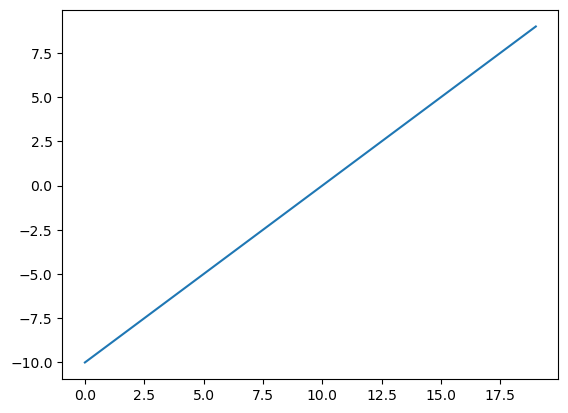

In [3]:
plt.plot(x)   # plot is used for line plot

In [4]:
y = 1/(1+np.exp(-x)) # Sigmoid function
y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

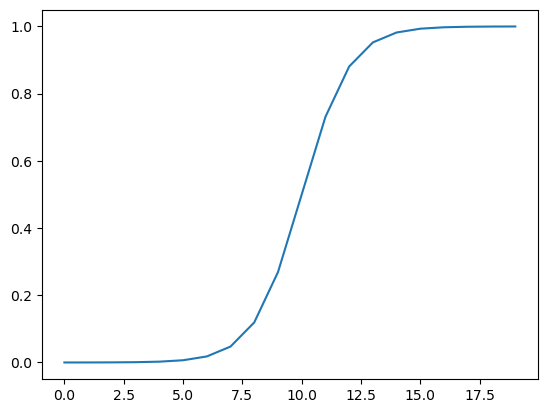

In [5]:
plt.plot(y) # Line plot

## Problem Statement
- we consider 1340 bodily injury liability claims from a single state, USA using a 2002 survey conducted by the Insurance Research Council(IRC).
- The survey is conducted in order to understand the characteristic of the claimants to be represented by an Attorney when settling a claim.
- The profit an insurance firm is often found to be dependent in whether the claimant appoints an Attorney or not ,apppointment of an Attorney can often increase the amount the claimnant can cliam from the firm.
- An insurance firm may be intrested in finding the probability of a claimant appointing An Attorney.
- Depending on the dempographic characteristics of the claimants who appoint an attorney, the form aims to design plocity instruments for diiferent target groups.

- Goal is to crate a classification model which can predict all positive classes correctly.

**Recall should be high.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
#load the data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/Logistic%20Regression/Client.csv',index_col=0)

In [8]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,0.0,1.0,0.0,50.0,34.940
1,3,0,1.0,0.0,0.0,18.0,0.891
2,66,0,0.0,1.0,0.0,5.0,0.330
3,70,1,0.0,1.0,1.0,31.0,0.037
4,96,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,0,0.0,1.0,0.0,NaN,0.576
1336,34110,1,1.0,1.0,0.0,46.0,3.705
1337,34113,0,1.0,1.0,0.0,39.0,0.099
1338,34145,1,1.0,0.0,0.0,8.0,3.177


### EDA

In [9]:
df.drop(columns=['CASENUM'], inplace=True)  #delete column permantly

In [10]:
df.head() # Top rows

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038


In [11]:
df.shape # No. of rows and columns

(1340, 6)

In [12]:
df.describe() # Descriptive statistics

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.511194,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,1.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [13]:
df.isna().sum()  #to check count of missing values

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

### Missing Value imputation

In [14]:
# Remove missing values from multiple columns
from sklearn.impute import SimpleImputer

In [15]:
# Create variable for class
si = SimpleImputer(strategy='most_frequent')
# mean
# median
# most_frequent -> mode

In [16]:
# Extract entries
df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4]) # Reassign

In [17]:
df.iloc[:,1:4]

,CLMSEX,CLMINSUR,SEATBELT
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
1335,0.0,1.0,0.0
1336,1.0,1.0,0.0
1337,1.0,1.0,0.0
1338,1.0,0.0,0.0


In [18]:
# Fill missing values by mean of that column
df['CLMAGE'].fillna(df['CLMAGE'].mean(), inplace=True)

In [19]:
# count of missing values by columnwise
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

### Splitting the data into training and testing set.

In [20]:
from sklearn.model_selection import train_test_split
# split data into train data and test data

In [21]:
# Define x & y
x = df.iloc[:,1:]
y = df['ATTORNEY']

In [22]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [23]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1335    0
1336    1
1337    0
1338    1
1339    0
Name: ATTORNEY, Length: 1340, dtype: int64

In [24]:
# Split the data 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=42)
# This sequence of values are mandatory.
#Size- It takes 20 % data to testing purpose.
# random state gives stable random sample. if we not mention it then it takes different random sample after executing cell. This affect our model building part

In [25]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1148,1.0,1.0,0.0,7.000000,3.734
807,0.0,1.0,0.0,16.000000,111.405
1287,0.0,0.0,0.0,10.000000,0.040
590,1.0,1.0,0.0,6.000000,0.100
1188,1.0,1.0,0.0,44.000000,13.000
...,...,...,...,...,...
1095,0.0,1.0,0.0,47.000000,0.080
1130,1.0,1.0,0.0,30.000000,5.595
1294,1.0,1.0,0.0,28.414422,1.041
860,1.0,0.0,0.0,55.000000,1.769


In [26]:
xtest

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
394,1.0,1.0,0.0,5.000000,5.163
881,0.0,0.0,0.0,28.414422,5.570
358,1.0,1.0,0.0,41.000000,0.671
367,0.0,1.0,0.0,34.000000,0.567
259,0.0,1.0,1.0,66.000000,4.530
...,...,...,...,...,...
109,0.0,1.0,0.0,28.414422,0.755
818,1.0,1.0,0.0,7.000000,6.000
538,1.0,1.0,0.0,28.414422,3.510
1286,1.0,1.0,1.0,44.000000,55.709


In [27]:
ytrain

1148    0
807     1
1287    0
590     0
1188    1
       ..
1095    1
1130    1
1294    1
860     1
1126    0
Name: ATTORNEY, Length: 1072, dtype: int64

In [28]:
ytest

394     1
881     1
358     0
367     1
259     1
       ..
109     1
818     1
538     0
1286    1
714     0
Name: ATTORNEY, Length: 268, dtype: int64

## Model Building 

In [29]:
from sklearn.linear_model import LogisticRegression
# logistic regression is class. And it contain sigmoid function

In [30]:
lg = LogisticRegression() #Assign variable

In [31]:
#Train the model
lg.fit(xtrain,ytrain)   # fit function done calculation w.r.t. sigmoid function


LogisticRegression()

In [32]:
lg.coef_

array([[-0.36400221, -0.33622227,  0.70544976, -0.00864279,  0.41179482]])

In [33]:
xtest

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
394,1.0,1.0,0.0,5.000000,5.163
881,0.0,0.0,0.0,28.414422,5.570
358,1.0,1.0,0.0,41.000000,0.671
367,0.0,1.0,0.0,34.000000,0.567
259,0.0,1.0,1.0,66.000000,4.530
...,...,...,...,...,...
109,0.0,1.0,0.0,28.414422,0.755
818,1.0,1.0,0.0,7.000000,6.000
538,1.0,1.0,0.0,28.414422,3.510
1286,1.0,1.0,1.0,44.000000,55.709


In [34]:
ytest

394     1
881     1
358     0
367     1
259     1
       ..
109     1
818     1
538     0
1286    1
714     0
Name: ATTORNEY, Length: 268, dtype: int64

In [35]:
#Prediction
ypred = lg.predict(xtest)
ypred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0], dtype=int64)

In [36]:
len(xtest)

268

In [37]:
len(ypred)

268

## Model Evaluation

In [38]:
print('Actual Y: ', ytest[:25].values)  #First 25 data points of actual value
print('Predict Y:', ypred[:25])  # First 25 data points of predicted value
# Here we check our model performance for 25 data points

Actual Y:  [1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0]
Predict Y: [1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1]


In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
confusion_matrix(ytest,ypred)
# Sequence -> TN, FP, FN, TP

array([[113,  27],
       [ 43,  85]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

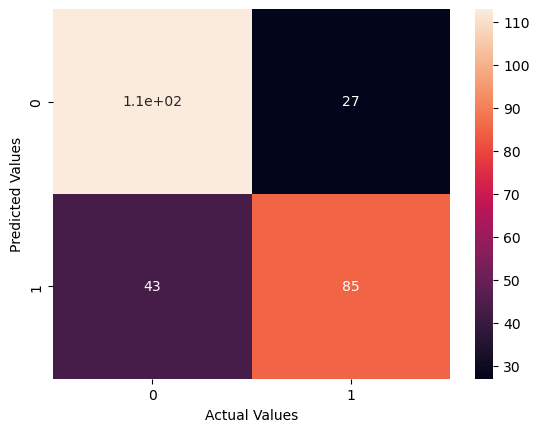

In [41]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True) # value represented in scientific format
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(50.722222222222214, 0.5, 'Predicted Values')

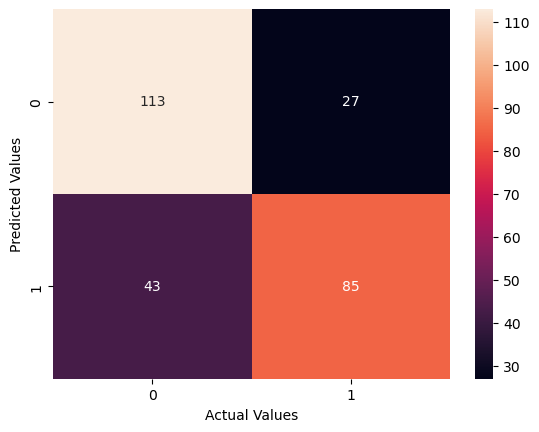

In [42]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True,fmt='g')  #Value represented in general format
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [43]:
# evaluation metric for accuracy
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       140
           1       0.76      0.66      0.71       128

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



## Threshold selection
- To increase accuracy of model we have to change threshold value

In [44]:
proba = lg.predict_proba(xtest)
proba
# Gives probability associated with 0 & 1

array([[2.12854965e-01, 7.87145035e-01],
       [1.22039108e-01, 8.77960892e-01],
       [7.01221503e-01, 2.98778497e-01],
       [6.15726006e-01, 3.84273994e-01],
       [1.69471557e-01, 8.30528443e-01],
       [3.56287182e-01, 6.43712818e-01],
       [6.01104476e-01, 3.98895524e-01],
       [5.46716045e-01, 4.53283955e-01],
       [5.58067883e-01, 4.41932117e-01],
       [1.21419969e-01, 8.78580031e-01],
       [6.57577339e-01, 3.42422661e-01],
       [6.80821714e-01, 3.19178286e-01],
       [5.90294651e-01, 4.09705349e-01],
       [5.55463628e-01, 4.44536372e-01],
       [6.77336723e-01, 3.22663277e-01],
       [2.62445580e-01, 7.37554420e-01],
       [6.66258364e-01, 3.33741636e-01],
       [7.25507737e-01, 2.74492263e-01],
       [6.55953242e-01, 3.44046758e-01],
       [8.70275656e-02, 9.12972434e-01],
       [1.25766064e-12, 1.00000000e+00],
       [2.98852482e-01, 7.01147518e-01],
       [2.40828474e-01, 7.59171526e-01],
       [4.96168917e-01, 5.03831083e-01],
       [1.989794

In [45]:
proba = lg.predict_proba(xtest)[:,1] # we select column of probability associted with 1 beacuse we have to check recall value 
proba

array([0.78714504, 0.87796089, 0.2987785 , 0.38427399, 0.83052844,
       0.64371282, 0.39889552, 0.45328395, 0.44193212, 0.87858003,
       0.34242266, 0.31917829, 0.40970535, 0.44453637, 0.32266328,
       0.73755442, 0.33374164, 0.27449226, 0.34404676, 0.91297243,
       1.        , 0.70114752, 0.75917153, 0.50383108, 0.80102056,
       0.33114364, 0.25381587, 0.30429291, 0.36060755, 0.31729251,
       1.        , 0.42549581, 0.24056504, 0.35231785, 0.34781805,
       0.28964215, 0.41451834, 0.69064869, 0.26948158, 0.62709475,
       0.44015036, 0.36978938, 0.46781306, 0.36671876, 0.26892739,
       0.56263865, 0.38312862, 0.66809986, 0.65169955, 0.44062312,
       0.80115025, 0.39664475, 0.30056149, 0.41286631, 0.20823411,
       1.        , 0.28365341, 0.29223782, 0.35551372, 0.31497782,
       0.99558394, 0.6248152 , 0.29483012, 0.59041082, 0.56276855,
       0.30836278, 0.33876473, 0.84362055, 0.26892739, 0.30937474,
       0.43416759, 0.68595226, 0.32136826, 0.38463945, 0.30525

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [47]:
auc = roc_auc_score(ytest,proba)

In [48]:
auc

0.765150669642857

In [49]:
fpr,tpr, threshold = roc_curve(ytest,proba)

In [50]:
threshold

array([       inf, 1.        , 1.        , 0.99558394, 0.98438949,
       0.98099229, 0.95336721, 0.93344023, 0.92829168, 0.92067521,
       0.90484527, 0.85301937, 0.8530163 , 0.81531197, 0.80232612,
       0.8010518 , 0.80102056, 0.7976006 , 0.79189513, 0.78714504,
       0.78652343, 0.76975208, 0.76300749, 0.7323561 , 0.72800768,
       0.71227488, 0.70114752, 0.69446964, 0.69422826, 0.67075266,
       0.66809986, 0.65169955, 0.65084182, 0.64371282, 0.63648695,
       0.60952867, 0.60461662, 0.59041082, 0.58527263, 0.57623011,
       0.56823739, 0.56170355, 0.55168495, 0.53190913, 0.53087466,
       0.49597283, 0.48743432, 0.46781306, 0.46227131, 0.45328395,
       0.44888381, 0.44062312, 0.44015036, 0.43939231, 0.43908802,
       0.43504852, 0.42549581, 0.4210058 , 0.41826218, 0.41451834,
       0.41441248, 0.39889552, 0.3985187 , 0.39664475, 0.39556121,
       0.39075294, 0.3899522 , 0.38463945, 0.38427399, 0.37943643,
       0.37822355, 0.36878873, 0.36533886, 0.36060755, 0.35908

In [51]:
len(threshold)

110

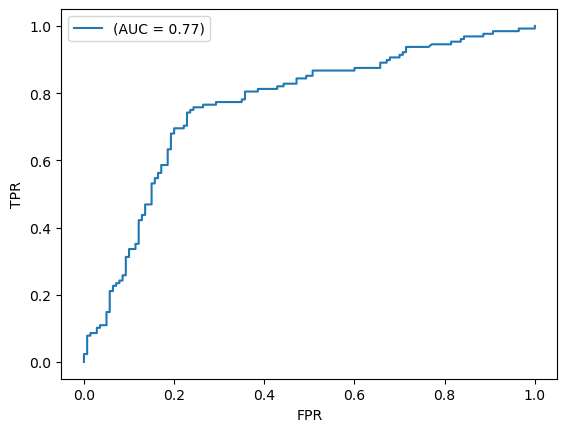

In [52]:
plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)  # line plot, it take 2 no. after decimal
plt.xlabel('FPR') # labels
plt.ylabel('TPR')
plt.legend()  # show label to graph

In [53]:
# We have to check for all thresold value. so we use for loop
accuracy = []  

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [54]:
accuracy

[0.5223880597014925,
 0.5223880597014925,
 0.5335820895522388,
 0.5522388059701493,
 0.5559701492537313,
 0.5522388059701493,
 0.5522388059701493,
 0.5522388059701493,
 0.5559701492537313,
 0.5522388059701493,
 0.5522388059701493,
 0.5634328358208955,
 0.5671641791044776,
 0.5895522388059702,
 0.5932835820895522,
 0.5932835820895522,
 0.5970149253731343,
 0.5932835820895522,
 0.5970149253731343,
 0.5932835820895522,
 0.5970149253731343,
 0.5970149253731343,
 0.6007462686567164,
 0.6194029850746269,
 0.6231343283582089,
 0.6268656716417911,
 0.6268656716417911,
 0.6268656716417911,
 0.6305970149253731,
 0.6567164179104478,
 0.6604477611940298,
 0.6604477611940298,
 0.664179104477612,
 0.6716417910447762,
 0.6716417910447762,
 0.6940298507462687,
 0.6977611940298507,
 0.6977611940298507,
 0.7014925373134329,
 0.7014925373134329,
 0.7052238805970149,
 0.7089552238805971,
 0.7089552238805971,
 0.7238805970149254,
 0.7276119402985075,
 0.7425373134328358,
 0.746268656716418,
 0.746268656716

In [55]:
final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [56]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
52,0.440150,0.757463
54,0.439088,0.757463
55,0.435049,0.753731
53,0.439392,0.753731
51,0.440623,0.753731
...,...,...
105,0.267732,0.514925
106,0.241616,0.492537
107,0.241037,0.488806
108,0.208234,0.477612


In [57]:
from sklearn.preprocessing import binarize

In [58]:
y = binarize([proba], threshold=0.440150)[0]
y

array([1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0.

In [59]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       140
           1       0.74      0.74      0.74       128

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268

